<h1 style="text-align:center; font-weight:bold;">Breast Cancer Detection</h1>

<img src= "resources/Breast-Cancer.jpg" width="1200" height="475">

<h1 style="color: white;background-color: #1e2023;"><b>Explanation:</b></h1>

- <b>What is Breast Cancer?</b>
   - Breast cancer is a devastating disease that affects millions of women worldwide. It is a malignant growth of cells in the breast tissue that can spread to other parts of the body, causing severe harm and potentially even death. Early detection is crucial in the fight against breast cancer, as the chances of successful treatment increase dramatically when the disease is caught in its earliest stages.The fight against breast cancer is an ongoing battle, but with increased awareness, early detection, and advances in treatment, we can work towards a future where breast cancer is no longer a threat to women's health and well-being.
- <b>Symptoms:</b>
   - The most common symptom of breast cancer is a lump in the breast. However, breast cancer can also cause other symptoms, including:
      - A change in the size or shape of the breast
      - Swelling of all or part of the breast
      - Skin irritation or dimpling
      - Breast pain
      - Nipple pain or the nipple turning inward
      - Redness, scaliness, or thickening of the nipple or breast skin
      - A nipple discharge other than breast milk
      - Any change in the size or shape of the nipple

<h1 style="color: white;background-color: #1e2023;"><b>Objective:</b></h1>

 - Find out how many women are diagnosed as Malignant and Benign tumors.
 - Perform different classification algorithms to predict the tumor as Malignant or Benign.<br>
  These algorithms are:
   - Linear Regression
   - Logistic Regression
   - K-Nearest Neighbors
   - Random Forest Classifier
   - Support Vector Machine
   - Naive Bayes
   - Decision Tree Classifier

<h1 style="color: white;background-color: #1e2023;"><b>Setup:</b></h1>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library for table
from prettytable import PrettyTable
# Scikit Learn for models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Loading Data Set
data = pd.read_csv("data.csv")

In [3]:
# Checking first 5 rows of data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Checking last 5 rows of data
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
# Shape of Data
data.shape

(569, 33)

In [6]:
# Statistical Summary
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# Checking info and explore data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Checking null values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Column Names
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

There are no null Values but there are two irrelevant columns so droping these columns

<h1 style="color: white;background-color: #1e2023;"><b>Feature Engineering:</b></h1>

In [10]:
# Droping columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)

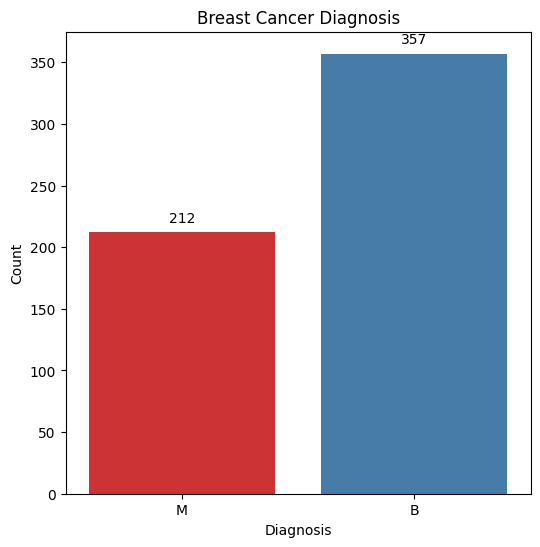

In [12]:
plt.figure(figsize=(6, 6))
plt.title('Breast Cancer Diagnosis')
ax = sns.countplot(x = data['diagnosis'], palette='Set1')

# Adding data labels to the bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding x-axis label
plt.xlabel('Diagnosis')

# Adding y-axis label
plt.ylabel('Count')

plt.show()

<h1 style="color: white;background-color: #1e2023;"><b>Finding:</b></h1>
- From above graph we can see that there are 357 cases of benign and 212 cases of malignant

---> For Machine Learning Algorithms Data should be pre-processed and converted into numerical values

<h1 style="color: white;background-color: #1e2023;"><b>Data Preprocessing:</b></h1>

Steps included in preprocessing:
- Encoding categorical columns
- Data Scaling

# <b>Encoding categorical columns</b>

In [13]:
# Diagnosis column is categorical, so we need to convert it to numerical
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# <b>Data Scaling</b>

In [15]:
# Before scaling split  data into X and y
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [16]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [18]:
# Scaling data
scaler = StandardScaler()
x = scaler.fit_transform(X)

Our data is now cleaned and pre-processed for ML algorithms and ready to be fed into the models

<h1 style="color: white;background-color: #1e2023;"><b>Machine Learning Models</b></h1>

We use the following models to predict the diagnosis of breast cancer
- Linear Regression
- Logistic Regression
- K-Nearest Neighbors
- Random Forest Classifier
- Support Vector Machine
- Naive Bayes
- Decision Tree Classifier
  

# Splitting the data into train and test set

In [19]:
# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h1 style="color: white;background-color: #1e2023;"><b>Logistic Regression</b></h1>

In [20]:
# Importing Logistic Regression model and fitting the model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
# Fit the model
log.fit(x_train, y_train)

LogisticRegression()

In [21]:
# Training and Test Accuracy
log_train_acc = round(log.score(x_train, y_train)*100, 2)
log_test_acc = round(log.score(x_test, y_test)*100, 2)
print("Training Accuracy: ", log_train_acc,"%")
print("Testing Accuracy: ", log_test_acc,"%")

Training Accuracy:  98.68 %
Testing Accuracy:  97.37 %


In [22]:
# Predict the model
y_pred = log.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [23]:
# Over all model Accuracy
from sklearn.metrics import accuracy_score
log_acc = round(accuracy_score(y_test, y_pred)*100,2)
print("Overall Accuracy of model: ", log_acc, "%")

Overall Accuracy of model:  97.37 %


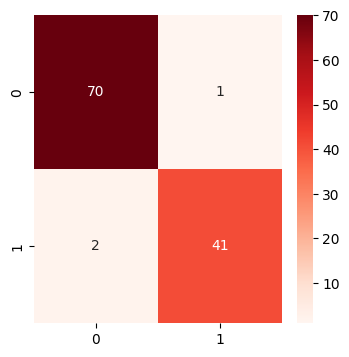

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.show()

<h1 style="color: white;background-color: #1e2023;"><b>KNearest Neighbors Model</b></h1>

In [25]:
# Importing KNN Model and fitting the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
# Training and Test Accuracy
knn_train_acc = round(knn.score(x_train, y_train)*100, 2)
knn_test_acc = round(knn.score(x_test, y_test)*100, 2)
print("Training Accuracy: ", knn_train_acc,"%")
print("Testing Accuracy: ", knn_test_acc,"%")

Training Accuracy:  98.02 %
Testing Accuracy:  94.74 %


In [27]:
# Predict the model
y_pred = knn.predict(x_test) 
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [28]:
# Over all model Accuracy
from sklearn.metrics import accuracy_score
knn_acc = round(accuracy_score(y_test, y_pred)*100,2)
print("Overall Accuracy of model: ", knn_acc, "%")

Overall Accuracy of model:  94.74 %


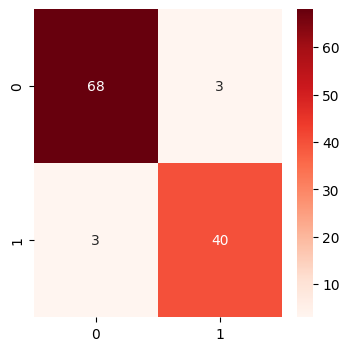

In [29]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.show()

<h1 style="color: white;background-color: #1e2023;"><b>Random Forest Classifier Model</b></h1>

In [30]:
# Importing Random Forest Model and fitting the model
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100, max_depth=2)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)

In [31]:
# Training and Test Accuracy
rfc_train_acc = round(rfc.score(x_train, y_train)*100, 2)
rfc_test_acc = round(rfc.score(x_test, y_test)*100, 2)
print("Training Accuracy: ", rfc_train_acc,"%")
print("Testing Accuracy: ", rfc_test_acc,"%")

Training Accuracy:  95.82 %
Testing Accuracy:  96.49 %


In [32]:
# Predict the model
y_pred = rfc.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [33]:
# Over all model Accuracy
from sklearn.metrics import accuracy_score
rfc_acc = round(accuracy_score(y_test, y_pred)*100,2)
print("Overall Accuracy of model: ", rfc_acc,"%")

Overall Accuracy of model:  96.49 %


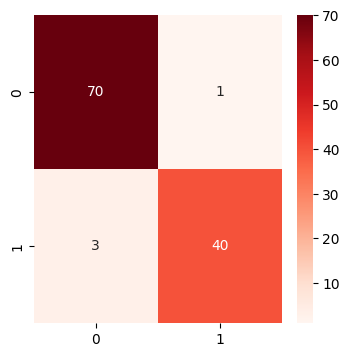

In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.show()

<h1 style="color: white;background-color: #1e2023;"><b>Support Vector Machine Model</b></h1>

In [35]:
# Importing Support Vector Machine Model and fitting the model
from sklearn.svm import SVC 
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [36]:
# Training and Test Accuracy
svm_train_acc = round(svm.score(x_train, y_train)*100, 2)
svm_test_acc = round(svm.score(x_test, y_test)*100, 2)
print("Training Accuracy: ", svm_train_acc,"%")
print("Testing Accuracy: ", svm_test_acc,"%")

Training Accuracy:  98.68 %
Testing Accuracy:  95.61 %


In [37]:
# Predict the model
y_pred = svm.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [38]:
# Over all model Accuracy
from sklearn.metrics import accuracy_score
svm_acc = round(accuracy_score(y_test, y_pred)*100,2)
print("Overall Accuracy of model: ", svm_acc,"%")

Overall Accuracy of model:  95.61 %


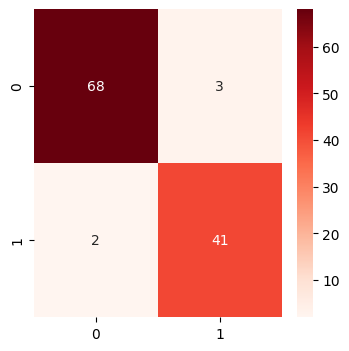

In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.show()

<h1 style="color: white;background-color: #1e2023;"><b>Naive Bayes Model</b></h1>

In [40]:
# Importing Naive Bayes Model and fitting the model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [41]:
# Training and Test Accuracy
nb_train_acc = round(nb.score(x_train, y_train)*100, 2)
nb_test_acc = round(nb.score(x_test, y_test)*100, 2)
print("Training Accuracy: ", nb_train_acc,"%")
print("Testing Accuracy: ", nb_test_acc,"%")

Training Accuracy:  93.63 %
Testing Accuracy:  96.49 %


In [42]:
# Predict the model
y_pred = nb.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [43]:
# Over all model Accuracy
from sklearn.metrics import accuracy_score
nb_acc = round(accuracy_score(y_test, y_pred)*100,2)
print("Overall Accuracy of model: ", nb_acc,"%")

Overall Accuracy of model:  96.49 %


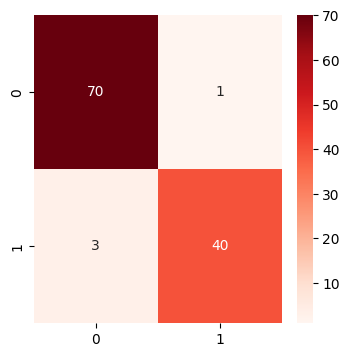

In [44]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.show()

<h1 style="color: white;background-color: #1e2023;"><b>Decision Tree Classifier</b></h1>

In [45]:
# Importing Decision Tree Model and fitting the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
# Training and Test Accuracy
dt_train_acc = round(dt.score(x_train, y_train)*100, 2)
dt_test_acc = round(dt.score(x_test, y_test)*100, 2)
print("Training Accuracy: ", dt_train_acc,"%")
print("Testing Accuracy: ", dt_test_acc,"%")

Training Accuracy:  100.0 %
Testing Accuracy:  94.74 %


In [47]:
# Predict the model
y_pred = dt.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [48]:
# Over all model Accuracy
from sklearn.metrics import accuracy_score
dt_acc = round(accuracy_score(y_test, y_pred)*100,2)
print("Overall Accuracy of model: ", dt_acc,"%")

Overall Accuracy of model:  94.74 %


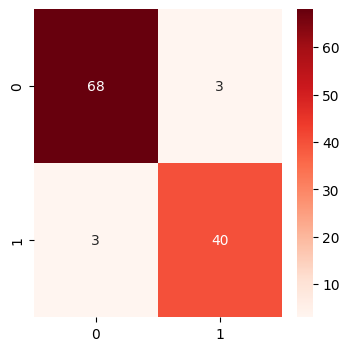

In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.show()

# Comparing the accuracy of all the models in tabular form

In [50]:
result = PrettyTable()
Models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree']
Training_Accuracy = [log_train_acc, knn_train_acc, rfc_train_acc, svm_train_acc, nb_train_acc, dt_train_acc]
Testing_Accuracy = [log_test_acc, knn_test_acc, rfc_test_acc, svm_test_acc, nb_test_acc, dt_test_acc]
Accuracy = [log_acc, knn_acc, rfc_acc, svm_acc, nb_acc, dt_acc]
result.add_column("Models", Models)
result.add_column("Training Accuracy", Training_Accuracy)
result.add_column("Testing Accuracy", Testing_Accuracy)
result.add_column("Overall Model Accuracy", Accuracy)
print(result)

+---------------------+-------------------+------------------+------------------------+
|        Models       | Training Accuracy | Testing Accuracy | Overall Model Accuracy |
+---------------------+-------------------+------------------+------------------------+
| Logistic Regression |       98.68       |      97.37       |         97.37          |
|         KNN         |       98.02       |      94.74       |         94.74          |
|    Random Forest    |       95.82       |      96.49       |         96.49          |
|         SVM         |       98.68       |      95.61       |         95.61          |
|     Naive Bayes     |       93.63       |      96.49       |         96.49          |
|    Decision Tree    |       100.0       |      94.74       |         94.74          |
+---------------------+-------------------+------------------+------------------------+


# Graphical view of the accuracy of all the models

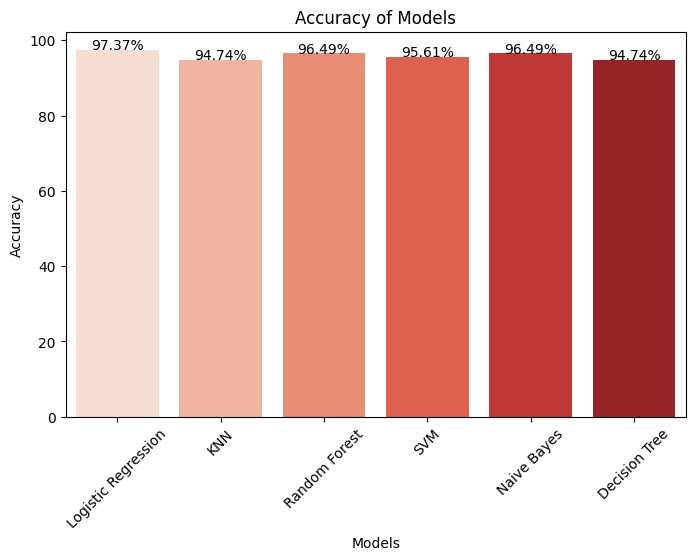

In [51]:

Models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree']
Accuracy = [log_acc, knn_acc, rfc_acc, svm_acc, nb_acc, dt_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x = Models, y = Accuracy, palette='Reds')

for i in range(len(Models)):
    text = str(round(Accuracy[i], 2)) + '%'
    plt.text(x=i, y=Accuracy[i]+0.05, s=text, ha='center')

plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

<h1 style="color: white;background-color: #1e2023;"><b>Conclusion</b></h1>

- After exploring Data set it is concluded that there are 357 cases of benign and 212 cases of malignant tumors.
- As above graph shows that all models have accuracy of more than 93.86% so we can say that all models are good for this dataset.
- So prediction of tumor as Malignant or Benign can be done by any of the above models.

<h1 style="color: white;background-color: #1e2023;"><b>Analysis Shortcoming & Data Limitations</b></h1>

- The dataset is small and it is not sufficient like large dataset.
- Only above one is shortcoming of this dataset, otherwise it is good dataset for analysis and prediction.